## Modelo autocura

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [28]:
dataframe = pd.read_csv(r"Desktop/Base_entrenamiento.csv")
dataframe.head(10)

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
0,7,7,2.857738,3.5,7,7.0,1.166667,7,0,2.333333,...,0.0,0,0,0,0.000000,0,2,1,1,201608
1,17,17,7.641989,12.0,17,17.0,8.000000,17,0,13.666667,...,0.0,2,0,0,8.810053,0,5,1,1,201611
2,27,36,12.868566,13.5,27,27.0,21.000000,27,0,14.000000,...,0.0,7,0,0,10.500000,0,9,1,1,201705
3,27,27,10.888832,13.5,27,27.0,4.833333,27,0,9.000000,...,0.0,0,0,0,0.000000,0,12,1,1,201609
4,32,32,11.651895,10.0,20,20.0,20.833333,20,0,17.333333,...,0.0,19,0,0,9.190000,0,15,1,1,201702
5,30,32,11.906581,28.5,27,27.0,22.833333,30,0,28.333333,...,0.0,7,0,0,10.500000,0,17,1,1,201705
6,0,0,0.000000,0.0,0,0.0,0.000000,0,0,0.000000,...,0.0,0,0,0,0.000000,1,20,1,1,201607
7,0,0,0.000000,0.0,0,0.0,0.000000,0,0,0.000000,...,0.0,1,0,0,9.591059,1,22,1,1,201612
8,0,0,0.000000,0.0,0,0.0,0.000000,0,0,0.000000,...,0.0,2,1,0,10.336827,1,26,1,1,201706
9,12,12,6.000000,6.0,12,12.0,3.000000,12,0,4.000000,...,0.0,0,0,0,0.000000,1,27,1,1,201607


In [29]:
print(dataframe.groupby('y_auto_cura').size())

y_auto_cura
0     6152
1    13848
dtype: int64


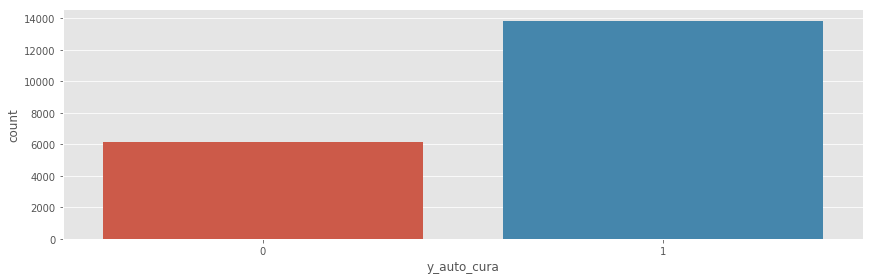

In [30]:
sb.factorplot('y_auto_cura',data=dataframe,kind="count", aspect=3)

In [31]:
X=dataframe.drop(['y_auto_cura'], axis=1)
y=dataframe['y_auto_cura']
 
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['max_trim', 'max_sem', 'desv_sem', 'max_bim', 'desv_trim'], dtype='object')


C:\Users\W\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 28  31  60  62  64  68  70  77  90  91  93  97 102 120 121] are constant.
  UserWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


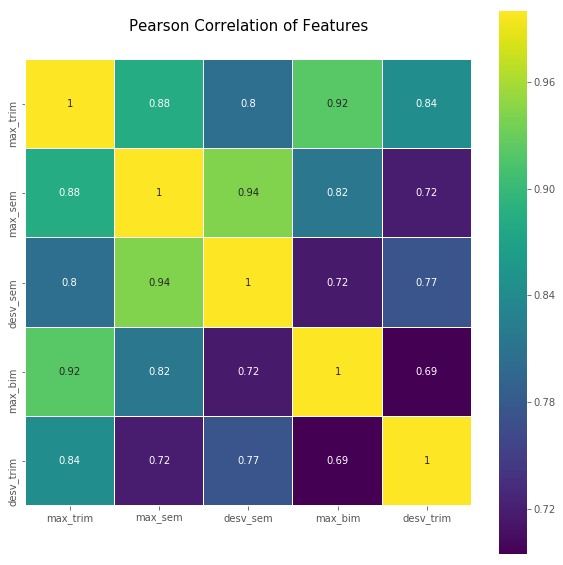

In [35]:
used_features =X.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [33]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(dataframe, test_size=1, random_state=5) 
y_train =X_train["y_auto_cura"]
y_test = X_test["y_auto_cura"]

In [34]:
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])
 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.71
Precisión en el set de Test: 1.00


In [26]:
#print(gnb.predict([0, 11,4,490731195,0, 0,0,2,0,0,0,1,0,0,0, 1,0,0,0,0, 3000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,3000000,0,0,0,765000,0,0,0,0,3000000,0,0,0,3000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1606500,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,201607
#]))
#Resultado esperado 0-, 1


#0, 11,4,490731195,0, 0,0,1,833333333,0,0,0,1,0,0,0, 1,0,0,0,0, 3000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,3000000,0,0,0,765000,0,0,0,0,3000000,0,0,0,3000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1606500,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,201607


In [41]:

print(gnb.predict([[0,        11,     0,       0,        2],
                   [17,        17,    12,       17,         4] ]))
#Resultado esperado 0 , 1-Autocura

[1 1]
